In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style='whitegrid')

In [2]:
df_sales = pd.read_csv('source/sales.csv', parse_dates=['DATE_ORDER'])
df_comp = pd.read_csv('source/comp_prices.csv', parse_dates=['DATE_EXTRACTION'])

In [3]:
print(f'Total Sales: {df_sales.shape[0]}')
print(f'Total Competitor Price: {df_comp.shape[0]}')

Total Sales: 351091
Total Competitor Price: 50114


In [4]:
df_sales['YEAR'] = df_sales['DATE_ORDER'].dt.year
df_sales['MONTH'] = df_sales['DATE_ORDER'].dt.month
df_sales['DAY'] = df_sales['DATE_ORDER'].dt.day
df_sales['WEEKDAY'] = df_sales['DATE_ORDER'].dt.weekday

df_comp['YEAR'] = df_comp['DATE_EXTRACTION'].dt.year
df_comp['MONTH'] = df_comp['DATE_EXTRACTION'].dt.month
df_comp['DAY'] = df_comp['DATE_EXTRACTION'].dt.day
df_comp['WEEKDAY'] = df_comp['DATE_EXTRACTION'].dt.weekday

In [5]:
df_sales['VL_UNIT'] = round(df_sales['REVENUE'] / df_sales['QTY_ORDER'], 2)

In [6]:
df_sales.set_index('DATE_ORDER', inplace=True)
df_comp.set_index('DATE_EXTRACTION', inplace=True)

In [7]:
df_sales.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-08-02,P6,1.0,1808.99,2015,8,2,6,1808.99
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00
2015-08-17,P6,1.0,1673.95,2015,8,17,0,1673.95
2015-08-11,P6,1.0,1674.00,2015,8,11,1,1674.00
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00


In [8]:
df_comp.head()

,PROD_ID,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
DATE_EXTRACTION,,,,,,,,
2015-01-30 08:11:38,P6,C3,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C1,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C6,1999.90,1,2015,1,30,4
2015-01-31 20:10:14,P6,C2,1894.88,2,2015,1,31,5
2015-01-31 20:10:14,P6,C3,1894.88,2,2015,1,31,5


In [9]:
df_sales.dtypes

PROD_ID       object
QTY_ORDER    float64
REVENUE      float64
YEAR           int64
MONTH          int64
DAY            int64
WEEKDAY        int64
VL_UNIT      float64
dtype: object

In [10]:
df_comp.dtypes

PROD_ID              object
COMPETITOR           object
COMPETITOR_PRICE    float64
PAY_TYPE              int64
YEAR                  int64
MONTH                 int64
DAY                   int64
WEEKDAY               int64
dtype: object

In [11]:
df_sales.describe()

,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
count,351091.000000,351091.000000,351091.0,351091.000000,351091.000000,351091.000000,351091.000000
mean,1.078837,764.953615,2015.0,5.968669,15.420167,2.655015,712.347413
std,1.103650,781.957331,0.0,2.638461,8.946808,1.734857,197.892699
min,1.000000,229.000000,2015.0,1.000000,1.000000,0.000000,229.000000
25%,1.000000,649.000000,2015.0,4.000000,7.000000,1.000000,649.000000
50%,1.000000,749.000000,2015.0,6.000000,16.000000,2.000000,749.000000
75%,1.000000,799.000000,2015.0,8.000000,23.000000,4.000000,794.320000
max,500.000000,368750.000000,2015.0,10.000000,31.000000,6.000000,2599.000000


In [12]:
df_comp.describe()

,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
count,50114.000000,50114.000000,50114.0,50114.000000,50114.000000,50114.000000
mean,1111.281449,1.499701,2015.0,6.106018,15.486411,2.927026
std,3805.613500,0.500005,0.0,2.440813,8.767202,1.979078
min,359.100000,1.000000,2015.0,1.000000,1.000000,0.000000
25%,549.000000,1.000000,2015.0,4.000000,8.000000,1.000000
50%,799.000000,1.000000,2015.0,6.000000,15.000000,3.000000
75%,1359.000000,2.000000,2015.0,8.000000,23.000000,5.000000
max,149900.000000,2.000000,2015.0,10.000000,31.000000,6.000000


In [13]:
df_sales['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [14]:
df_comp['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [15]:
df_sales.nunique()

PROD_ID         9
QTY_ORDER      39
REVENUE      3078
YEAR            1
MONTH          10
DAY            31
WEEKDAY         7
VL_UNIT      2058
dtype: int64

In [16]:
df_comp.nunique()

PROD_ID                9
COMPETITOR             6
COMPETITOR_PRICE    2013
PAY_TYPE               2
YEAR                   1
MONTH                 10
DAY                   31
WEEKDAY                7
dtype: int64

In [17]:
df_sales.isnull().sum()

PROD_ID      0
QTY_ORDER    0
REVENUE      0
YEAR         0
MONTH        0
DAY          0
WEEKDAY      0
VL_UNIT      0
dtype: int64

In [18]:
df_comp.isnull().sum()

PROD_ID             0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
YEAR                0
MONTH               0
DAY                 0
WEEKDAY             0
dtype: int64

In [19]:
df_sales.skew()

QTY_ORDER    278.768158
REVENUE      304.089991
YEAR           0.000000
MONTH         -0.260743
DAY           -0.051926
WEEKDAY        0.304711
VL_UNIT        1.765345
dtype: float64

In [20]:
df_sales.kurtosis()

QTY_ORDER    119971.632957
REVENUE      139996.717825
YEAR              0.000000
MONTH            -1.051368
DAY              -1.185817
WEEKDAY          -0.813706
VL_UNIT           8.953788
dtype: float64

# Exploratory Data Analysis

### 1. Revenue

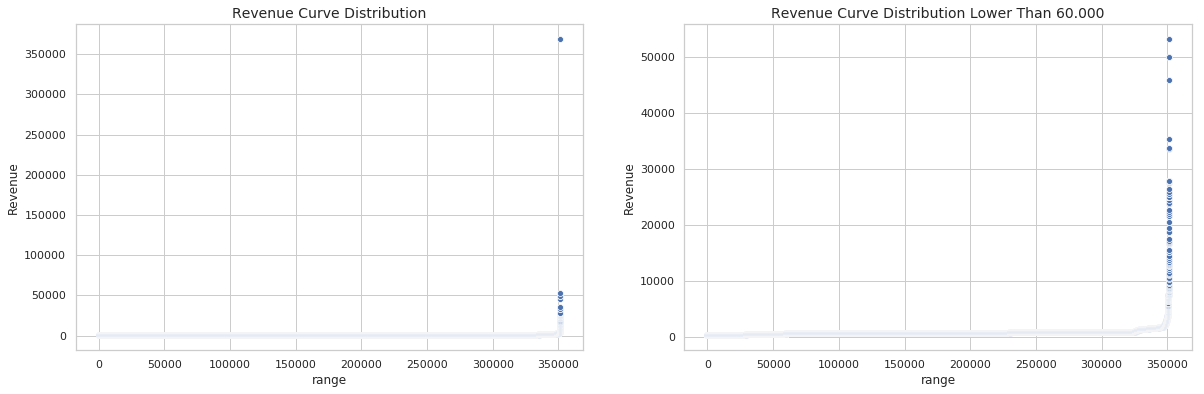

In [21]:
revenues = np.sort(df_sales.loc[df_sales['REVENUE'] < 60000, 'REVENUE'].values)

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.scatterplot(
    x=range(df_sales.shape[0]),
    y=np.sort(df_sales['REVENUE'].values)
)

plt.title('Revenue Curve Distribution', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.subplot(122)
sns.scatterplot(
    x=range(len(revenues)),
    y=revenues
)

plt.title('Revenue Curve Distribution Lower Than 60.000', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.show()

**Revenue Curve Distribution**
- *Podemos observar um valor totalmente fora do normal em comparação as outras receitas*
- *A distância entre um valor e o anterior tem um salto de aproximadamente 56 mil para 360 mil.*

**Revenue Curve Distribution Lower Than Max Value**
- *No segundo gráfico podemos visualizar uma curva mais uniforme, sem muitos valores distantes comparados aos demais.*

/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


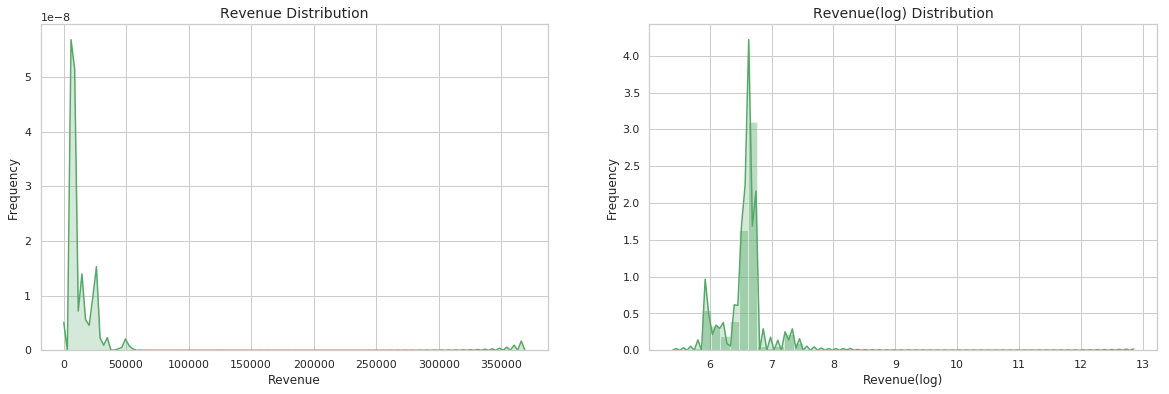

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(
    df_sales['REVENUE'],
    color='g', 
    hist=False, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution', fontsize=14)

plt.subplot(122)
sns.distplot(
    np.log(df_sales['REVENUE']),
    color='g', 
    hist=True, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue(log)')
plt.ylabel('Frequency')
plt.title('Revenue(log) Distribution', fontsize=14)

plt.show()

-

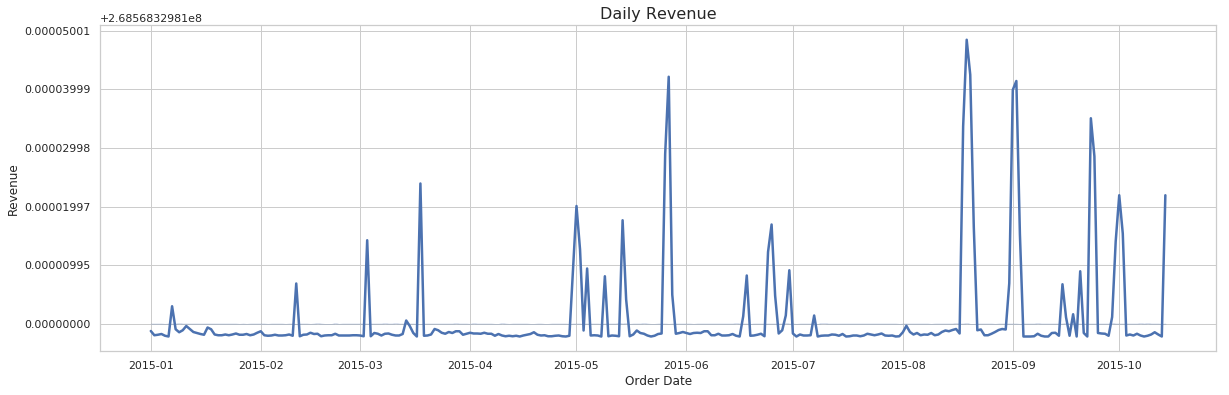

In [24]:
plt.figure(figsize=(20, 6))

sns.lineplot(
    x=df_sales.index, 
    y=df_sales['REVENUE'].sum(),
    palette='tab10', 
    linewidth=2.5
)

plt.ylabel('Revenue')
plt.xlabel('Order Date')
plt.title('Daily Revenue', fontsize=16)

plt.show()

**Média**
- Podemos reparar picos de vendas em determinados pontos do gráfico, muitos deles estão concentrados entre o meio do mês anterior até o início do mês seguinte. Talvez por questões de recebimento de salário possa ser um dos fatores para estes eventos.

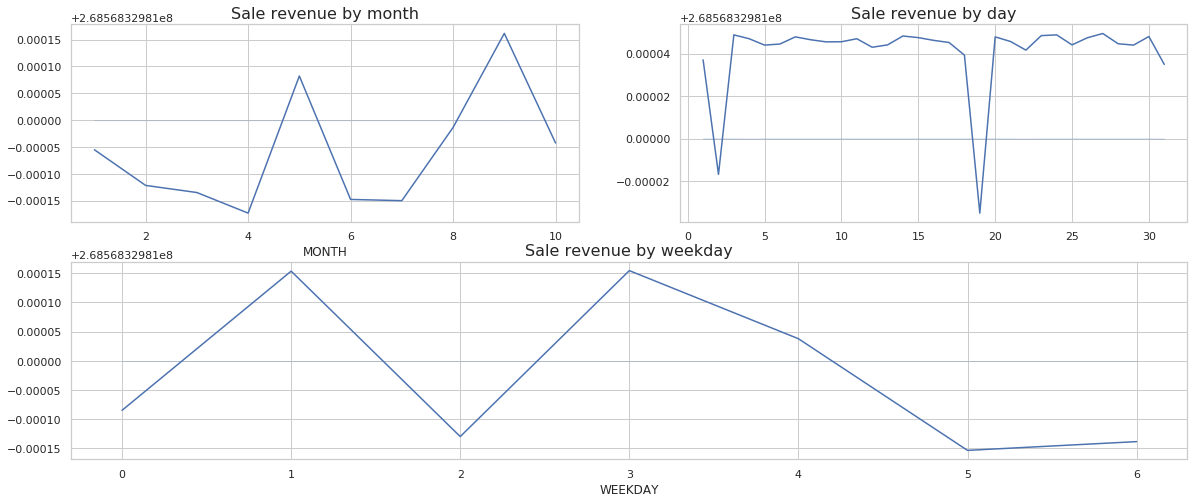

In [25]:
plt.figure(figsize=(20, 8))

plt.subplot(221)
sns.lineplot(x='MONTH', y=round(df_sales['REVENUE'].sum(), 2), data=df_sales, palette='tab10')

plt.title('Sale revenue by month', fontsize=16)

plt.subplot(222)
sns.lineplot(
    x=(df_sales['DAY'].values),
    y=round(df_sales['REVENUE'].sum(), 2), 
    palette='tab10'
)

plt.title('Sale revenue by day', fontsize=16)

plt.subplot(212)
sns.lineplot(x='WEEKDAY', y=round(df_sales['REVENUE'].sum(), 2), data=df_sales, palette='tab10')

plt.title('Sale revenue by weekday', fontsize=16)

plt.show()

### 2. Products

In [26]:
df_sales.PROD_ID.value_counts()

P7    195939
P2     63358
P8     27840
P5     19775
P9     18431
P4     14656
P6      4102
P1      4091
P3      2899
Name: PROD_ID, dtype: int64

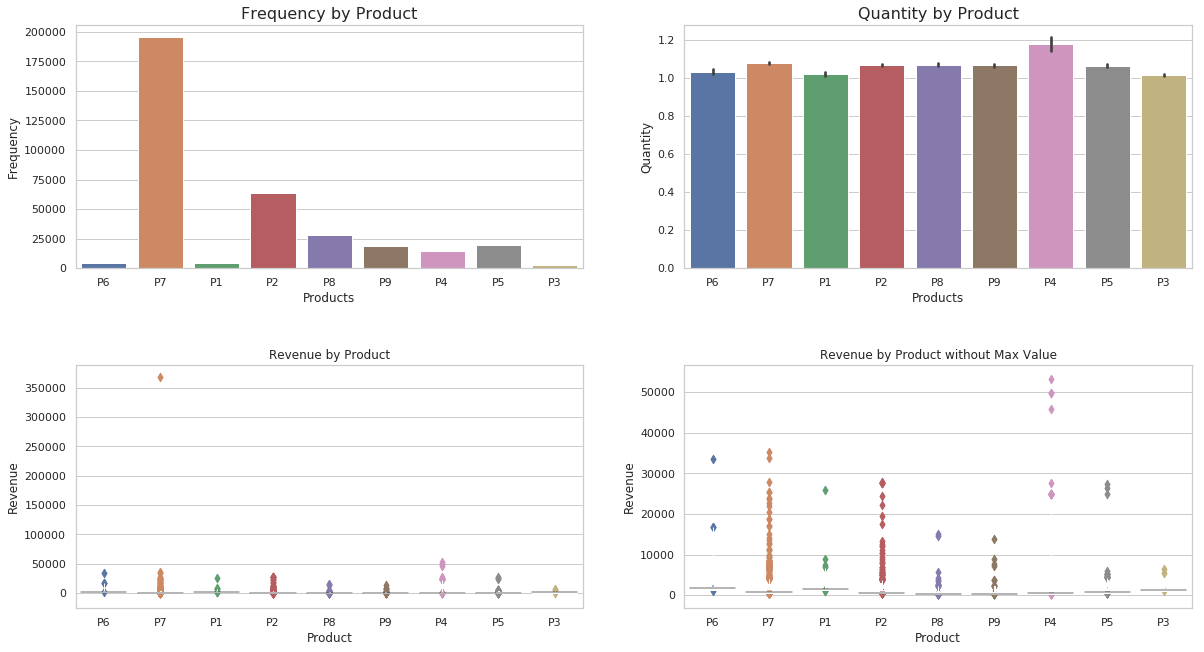

In [27]:
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, top=0.8)

plt.subplot(221)
sns.countplot(x='PROD_ID', data=df_sales)

plt.title('Frequency by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Frequency')

plt.subplot(222)
sns.barplot(x='PROD_ID', y='QTY_ORDER', data=df_sales)

plt.title('Quantity by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Quantity')

plt.subplot(223)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales)

plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.subplot(224)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales[df_sales['REVENUE'] < df_sales['REVENUE'].max()])

plt.title('Revenue by Product without Max Value')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.show()

**Frequency by Product**
- Neste plot observamos que os produtos 7 e 2 possuem uma frequência maior em cada vendas no geral (não sendo considerado as suas respectivas quantidades vendidas).

**Quantity by Product**
- Neste gráfico analisamos a quantidade total vendida de cada produto em cada venda. Apesar dos produtos 7 e 2 terem mais frequências em cada venda realizada, os dados nos indicam que o produto 4 possui uma maior quantidade vendida. Mesmo que ele não tenha tanta frequência em muitas vendas, os clientes compram este produto em maior quantidade do que os outros produtos.

**Revenue by Product**
- Assim como no gráfico anterior o produto 7 continua tendo um destaque no valor da receita comparado aos outros produtos. Aqui visualizamos claramente que existe uma venda onde o valor do seu produto é muito superior aos outros, tornando assim essa diferença e a distância visualizada no gráfico.

**Revenue by Product without Max Value**
- Neste plot retiramos o valor da receita significativa do produto 7 para analisarmos melhor o comportamento dos outros produtos. Ao retirarmos podemos observar em um primeiro momento que o produto 4 possui um valor de receita significativo logo após o produto 7.
- Mesmo que o produto 4 esteja destacado em relação aos outros no gráfico, podemos observar que essa diferença depende da quantidade dos produtos vendidos em cada venda, pois os seus valores possuem uma distância entre eles.
- Já para o produto 7 vemos uma concentração muito próxima dos pontos, deixando a reta dos seus valores mais homogêneos do que o produto 4, se não tivermos uma quantidade significativa para o produto, o seu valor de receite tende a diminuir.
- O produto 2 também apresenta o mesmo comportamento do produto 7 sem o outlier, uma reta onde os seus pontos (valores) são mais próximos uns dos outros, tendo assim uma maior conscistência.


### 3. P1

In [81]:
df_sales_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_sales_p1.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-27,P1,1.0,1490.17,2015,7,27,0,1490.17
2015-07-30,P1,1.0,1499.00,2015,7,30,3,1499.00
2015-07-28,P1,1.0,1499.00,2015,7,28,1,1499.00
2015-07-25,P1,1.0,1499.00,2015,7,25,5,1499.00
2015-07-29,P1,1.0,1499.00,2015,7,29,2,1499.00


Total revenue by month of P1:
MONTH
2     1520.643624
3     1415.883372
4     1449.256189
5     1428.343927
6     1457.955683
7     1503.004047
8     1508.453512
9     1516.348482
10    1547.157919
Name: REVENUE, dtype: float64


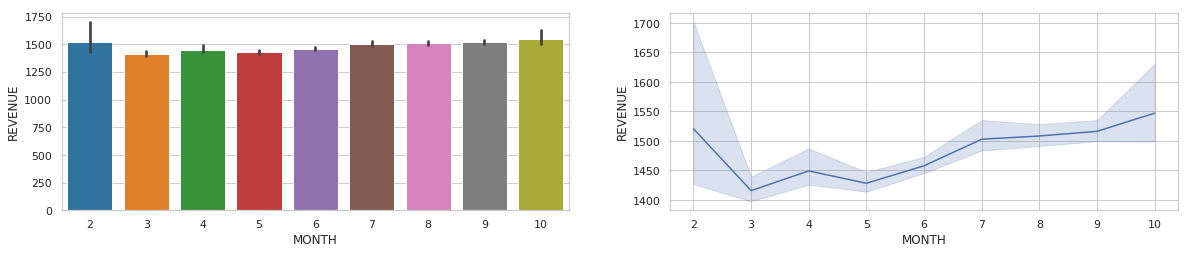

In [80]:
print('Total revenue by month of P1:')
# print(df_sales_p1.groupby('MONTH')['REVENUE'].sum())
print(df_sales_p1.groupby('MONTH')['REVENUE'].mean())

plt.figure(figsize=(20, 8))

plt.subplot(221)
sns.barplot(x=df_sales_p1['MONTH'], y=df_sales_p1['REVENUE'], palette='tab10')

plt.subplot(222)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p1)

plt.show()

In [58]:
df_sales.groupby('PROD_ID').size()

PROD_ID
P1      4091
P2     63358
P3      2899
P4     14656
P5     19775
P6      4102
P7    195939
P8     27840
P9     18431
dtype: int64